<a href="https://colab.research.google.com/github/M-Borsuk/LeagueOfLegendsWinPrediction/blob/main/LolWinPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!pip install plotly plotly-orca

ERROR: Could not find a version that satisfies the requirement plotly-orca (from versions: none)
ERROR: No matching distribution found for plotly-orca


# **General imports**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams
####################################################
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [47]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'svg'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [67]:
pio.renderers.default = "notebook_connected"

In [15]:
sns.set("poster","ticks")
sns.color_palette("tab10")
rcParams['figure.figsize'] = 10,14

In [16]:
df = pd.read_csv("/content/drive/My Drive/Lol data/high_diamond_ranked_10min.csv")

In [17]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [18]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

As we can see, we have columns related to both of the teams in the same game. That means that we can safely delete columns related to one of the teams.

In [20]:
blue = [column for column in df.columns if column[:4] == "blue"]
red = [column for column in df.columns if column[:4] != "blue"]

In [21]:
df = df.drop(columns=red)

In [22]:
df.columns = [column[4:] for column in df.columns]

In [23]:
df.head()

,Wins,WardsPlaced,WardsDestroyed,FirstBlood,Kills,Deaths,Assists,EliteMonsters,Dragons,Heralds,TowersDestroyed,TotalGold,AvgLevel,TotalExperience,TotalMinionsKilled,TotalJungleMinionsKilled,GoldDiff,ExperienceDiff,CSPerMin,GoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wins                      9879 non-null   int64  
 1   WardsPlaced               9879 non-null   int64  
 2   WardsDestroyed            9879 non-null   int64  
 3   FirstBlood                9879 non-null   int64  
 4   Kills                     9879 non-null   int64  
 5   Deaths                    9879 non-null   int64  
 6   Assists                   9879 non-null   int64  
 7   EliteMonsters             9879 non-null   int64  
 8   Dragons                   9879 non-null   int64  
 9   Heralds                   9879 non-null   int64  
 10  TowersDestroyed           9879 non-null   int64  
 11  TotalGold                 9879 non-null   int64  
 12  AvgLevel                  9879 non-null   float64
 13  TotalExperience           9879 non-null   int64  
 14  TotalMin

In [25]:
df.describe()

,Wins,WardsPlaced,WardsDestroyed,FirstBlood,Kills,Deaths,Assists,EliteMonsters,Dragons,Heralds,TowersDestroyed,TotalGold,AvgLevel,TotalExperience,TotalMinionsKilled,TotalJungleMinionsKilled,GoldDiff,ExperienceDiff,CSPerMin,GoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000


# **Exploratory Data Analysis**



---


Let's start by getting some insight of how our data looks in each of the columns

In [26]:
def plot_countplot(df,x):
  sns.countplot(x=x,data = df)
  plt.title("Distribution of {} values".format(x))
  plt.show()

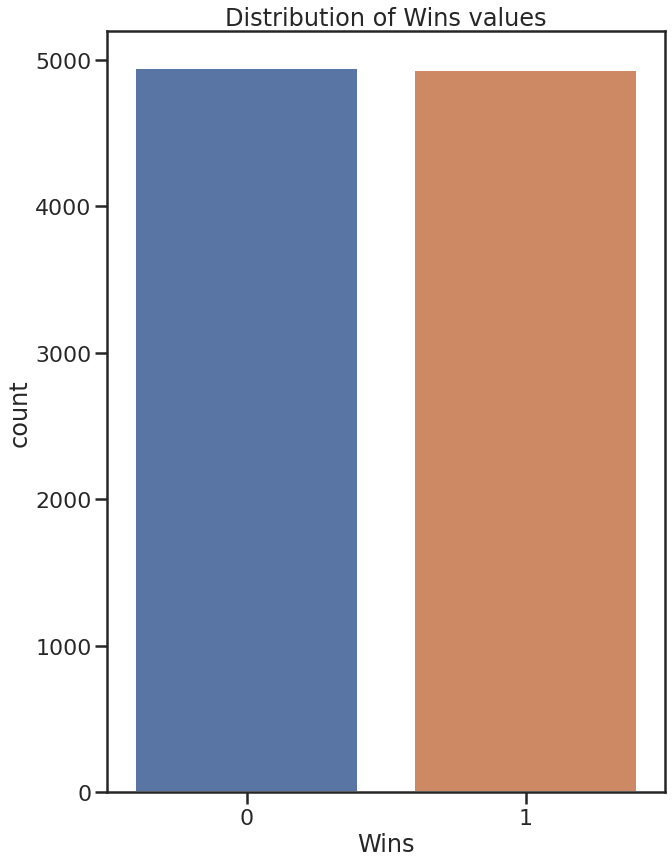

In [28]:
plot_countplot(df,"Wins")

Okay. Our dependent variable has the same number of records for each of the class. That means we don't have to apply any balancing of our target variable (like SMOTE or undersampling etc.)

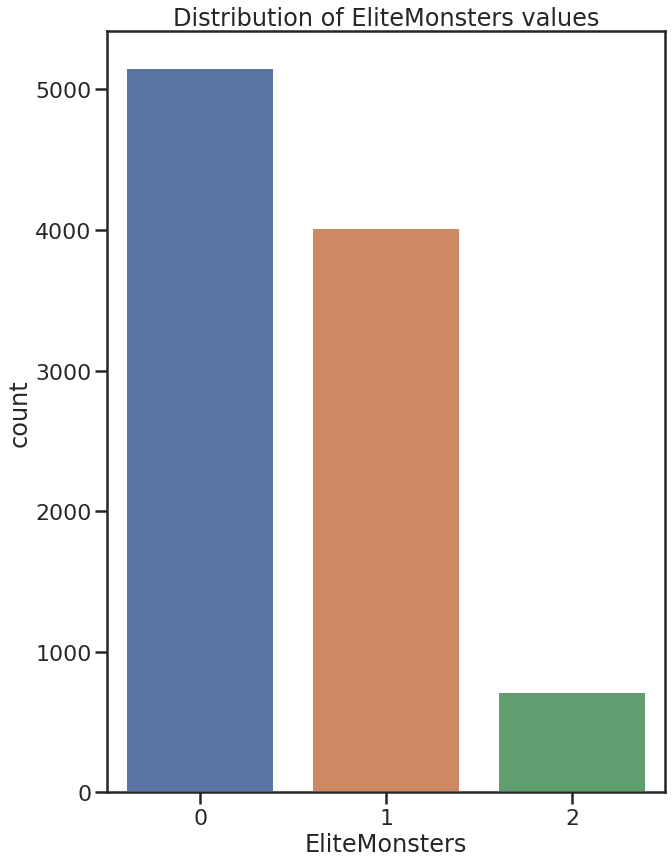

In [29]:
plot_countplot(df,"EliteMonsters")

This plot shows that in most of the games noone of the elite monsters (dragons/heralds) are slayed in the first 10 minutes of the game. That generally makes sense since your team has to be really ahead to kill one of those in the early game.

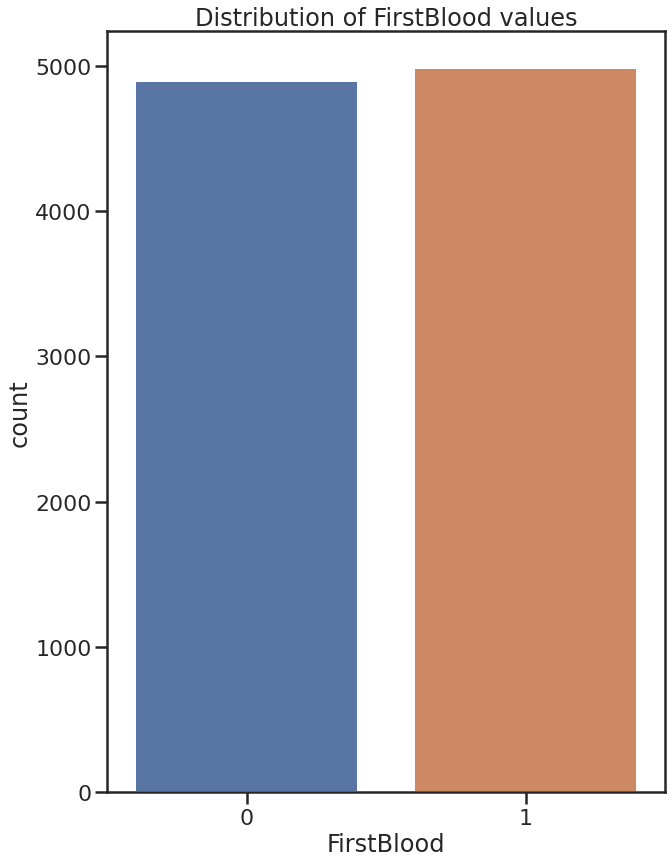

In [30]:
plot_countplot(df,"FirstBlood")

Our first blood column is also very balanced across the game we have the data on.

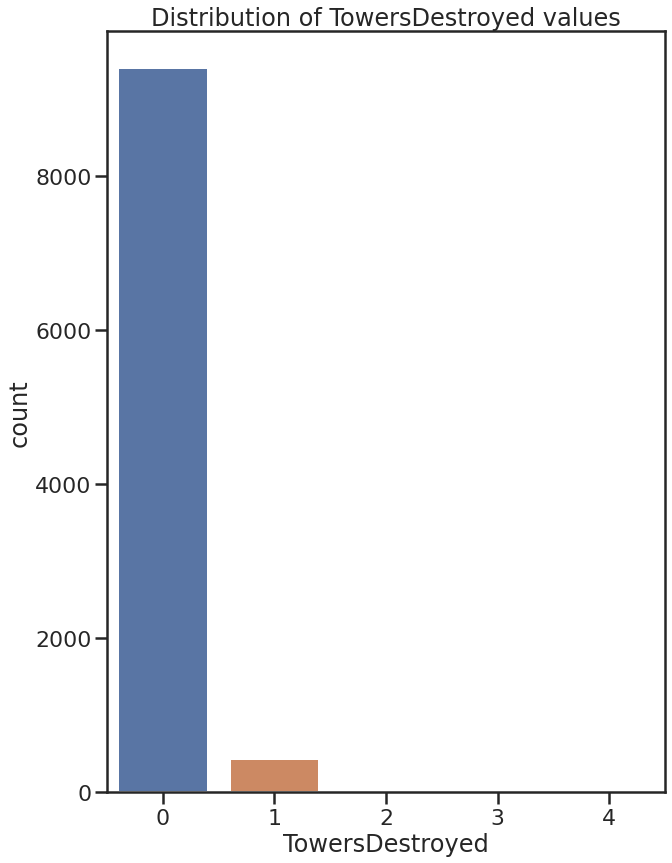

In [31]:
plot_countplot(df,"TowersDestroyed")

Just like with the elite monsters, in most of the games the team does not destroy any towers in the first 10 minutes. Although here this trend is much more apparent. It's very hard to destroy the opponents tower in the early stages of the game

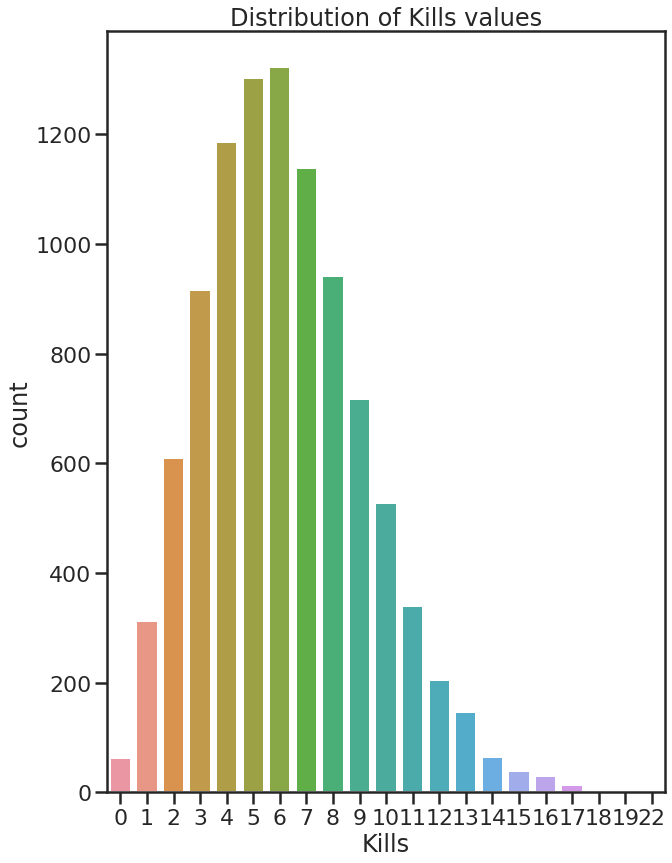

In [32]:
plot_countplot(df,"Kills")

The kills variable is slightly right-skewed. Later on we will definitely look into it. We might be able to transform this data to fit the normal distribution better.

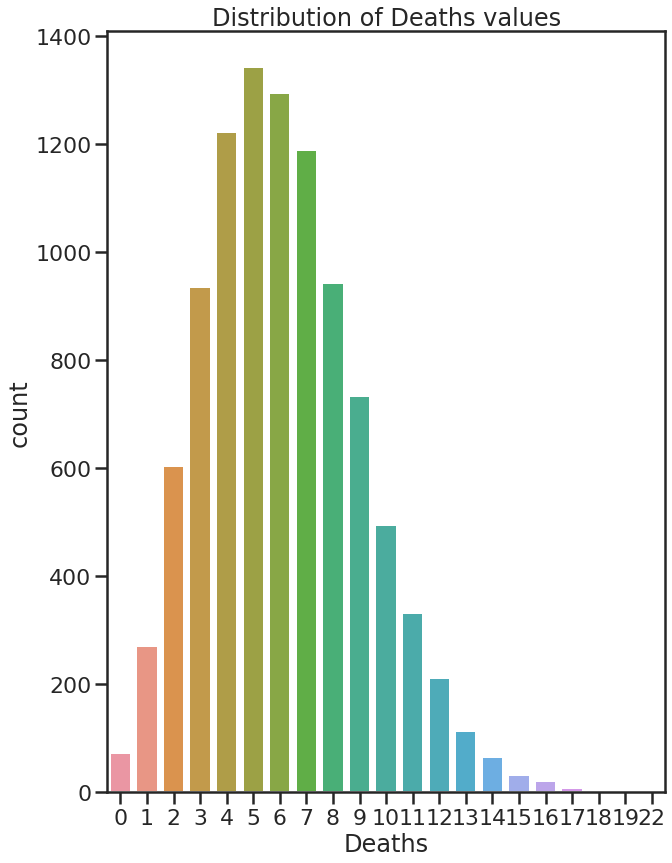

In [33]:
plot_countplot(df,"Deaths")

Same situation as with the kills column. We'll look into those later on.

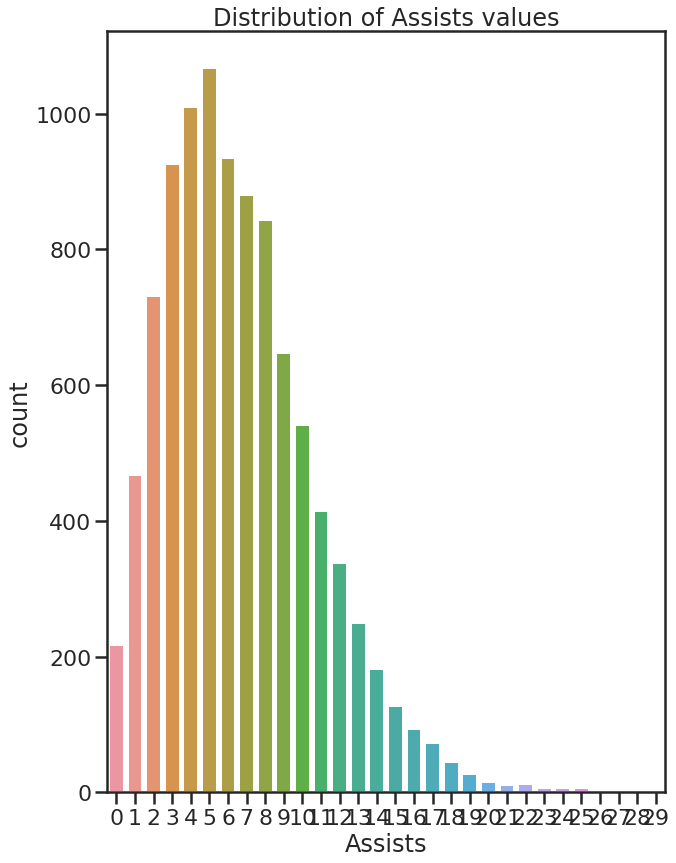

In [34]:
plot_countplot(df,"Assists")

Same as two previous ones..


---



Next I would like to look at the histograms, that will allow us to view the distribution of our variables. We looked at the distribution of some of our variables already, but now I would like to explore how they differ with relation to our target variable.

In [68]:
def plot_histogram(x0,x1 = None):
  fig = go.Figure()
  fig.add_trace(go.Histogram(x=x0,name="Lost",histnorm='probability density'))
  fig.add_trace(go.Histogram(x=x1,name="Won",histnorm='probability density'))
  fig.update_layout(barmode='overlay',title="{}".format(x0.name))
  fig.update_traces(opacity=0.5)
  fig.show()

In [69]:
plot_histogram(df["TotalMinionsKilled"])

As we can see, the amount of minions killed in total by the team is generally normally distributed. Let's now view how it differs based on the fact if they won or not.

In [70]:
plot_histogram(df[df["Wins"] == 0]["TotalMinionsKilled"],df[df["Wins"] == 1]["TotalMinionsKilled"])

We can see that these to distributions overlap a lot. But what's interesting is that on average the winning team kills more minions in the early stage of the game. This is of course pretty logical. As we kill more minions, we gain more gold, we get more items etc. So good CS'ing in the early game can definitely pay off in the end.

In [71]:
plot_histogram(df["WardsPlaced"])

Next up is the amount of wards placed in total by the team in the first 10 minutes of the game. We can see that it generally peaks at 16 wards and a smaller spike at 38.

In [72]:
plot_histogram(df[df["Wins"] == 0]["WardsPlaced"],df[df["Wins"] == 1]["WardsPlaced"])

Ok These distribution basically overlap.. What is also interesting is these points above 50 wards placed. We can see that in some of the games some team placed even 250 wards! We will have to look into that when we deal with the outliers if we decide to use that variable in our modelling.